# With Json Lines

In [36]:
import jsonlines as jsonl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


In [37]:
file = "datasets/labeled_datasets/labeled_dataset_1683538348.jsonl"
dataset = {}
with jsonl.open(file) as reader:
    for line in reader:
        dataset.update(line)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/labeled_datasets/labeled_dataset_1683538348.jsonl'

In [38]:
print(f"top level keys: {dataset.keys()}")
print(f"properties: {dataset['props'].keys()}")
idx = 0
print(f"dataset size: {len(dataset['dataset'])}")
print(f"dataset: {dataset['dataset'][idx].keys()}")

top level keys: dict_keys([])


KeyError: 'props'

In [39]:
# -- data
idx = 2
print("filename:", dataset['dataset'][idx]['file_name'])
data = np.array(dataset['dataset'][idx]['data'])
print("data shape: ", data.shape)
keypoints = np.array(dataset['dataset'][idx]['kp'])
print("keypoints shape: ", keypoints.shape)
print("label:", dataset['dataset'][idx]['label'])

KeyError: 'dataset'

NameError: name 'data' is not defined

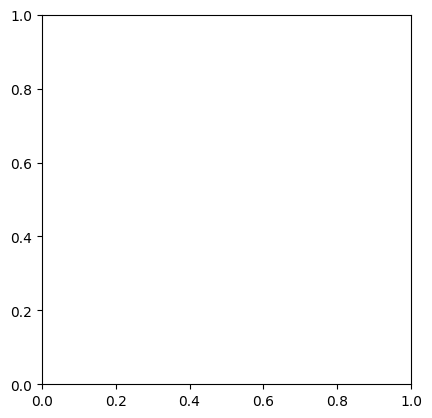

In [3]:
frame = 15 # the frame to plot
# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(data[frame])
# -- draw keypoints
kp = keypoints.squeeze() # -- append to function
for k in range(17):
    circ = Circle((kp[frame][k][1],kp[frame][k][0]),3)
    ax.add_patch(circ)
        


# With H5py

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import sys
sys.path.append("../")
from hdf5_utils import load_from_hdf5

In [2]:
file = "../datasets/unlabeled_datasets/unlabeled_videos1685530065.h5"
dataset_props, img_data, kp_data, file_name =  load_from_hdf5(file)

-- loading dataset --


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../datasets/unlabeled_datasets/unlabeled_videos1685530065.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

In [10]:
print("Dataset Properties: ",dataset_props)
print("Image data shape: ", img_data.shape)
print("Keypoint data shape: ", kp_data.shape)
print("File name: ", len(file_name))

Dataset Properties:  {'fps': 5.0, 'frame_count': 30, 'frames_saved': 20, 'height': 360, 'width': 640}
Image data shape:  (76, 20, 360, 640, 3)
Keypoint data shape:  (76, 20, 17, 3)
File name:  76


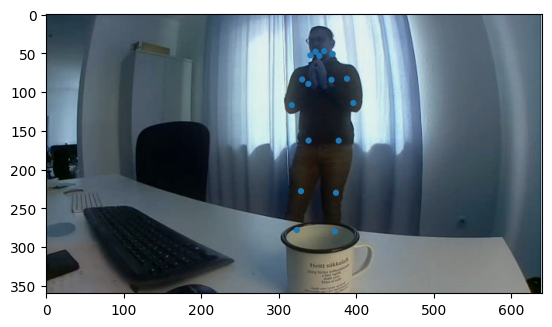

In [11]:
video = 0
frame = 5 # the frame to plot
# Create a figure. Equal aspect so circles look circular
img = (img_data[video][frame]).astype(np.uint8)
h, w = img.shape[:2]
keypoints = kp_data[video]
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(img)
# -- draw keypoints
kp = keypoints.squeeze() # -- append to function
for k in range(17):
    circ = Circle((kp[frame][k][0]*w, (kp[frame][k][1]*h)), 4)
    ax.add_patch(circ)
        

# Labeled Dataset

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import sys
sys.path.append("../")
from hdf5_utils import load_from_hdf5

In [7]:
file = "../datasets/labeled_datasets/labeled_dataset_1685611387.h5"
dataset_props, img_data, kp_data, file_name, targets =  load_from_hdf5(file)

-- loading dataset --
['file_name', 'img_data', 'kp_data', 'target']


In [8]:
print("Dataset Properties: ",dataset_props)
print("Image data shape: ", img_data.shape)
print("Keypoint data shape: ", kp_data.shape)
print("File name: ", len(file_name))

Dataset Properties:  {'fps': 5.0, 'frame_count': 30, 'frames_saved': 20, 'height': 360, 'width': 640}
Image data shape:  (76, 20, 360, 640, 3)
Keypoint data shape:  (76, 20, 17, 3)
File name:  76


pose_1685100735.avi
[0 0 0 1 0 0 0 0]
(17, 3)


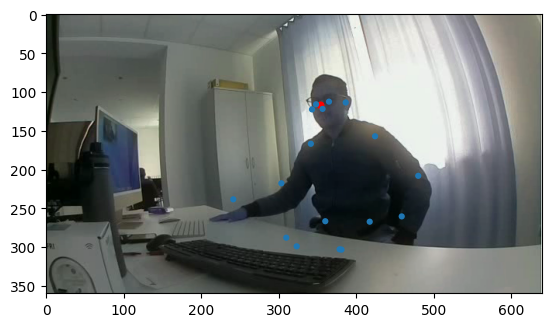

In [41]:
video = 19
frame = 5 # the frame to plot
# Create a figure. Equal aspect so circles look circular
print(file_name[video])
print(targets[video])
img = (img_data[video][frame]).astype(np.uint8)
h, w = img.shape[:2]
keypoints = kp_data[video]
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(img)
# -- draw keypoints
kp = keypoints.squeeze() # -- append to function

# -- debug: calculate center point
pose = keypoints
body_kp = [5,6,11,12]
body_coords = pose[body_kp,:2]
body_coords = body_coords.T
x = body_coords[0].mean()
y = body_coords[1].mean()
circ = Circle((x*w, y*h), 4, color='r')
print((pose[1] - x).shape)
ax.add_patch(circ)
#pose = pose.T
#print(pose[0].shape)
#print(x)
#pose[1] = (pose[1] - x) / 640
#pose[0] = (pose[0] - y) / 360

for k in range(17):
    circ = Circle((kp[frame][k][0]*w, (kp[frame][k][1]*h)), 4)
    ax.add_patch(circ)